In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
file_path = "cons.xlsx"
all_sheets = pd.read_excel(file_path, sheet_name=None)

In [ ]:
all_data = pd.DataFrame()

for sheet_name, sheet_data in all_sheets.items():
    # Supprimer la première colonne (les heures)
    sheet_data = sheet_data.iloc[:, 1:]
    # Garder uniquement les lignes contenant des valeurs numériques
    sheet_data = sheet_data.apply(pd.to_numeric, errors='coerce')
    sheet_data = sheet_data.dropna(how='all')  # Supprimer les lignes complètement vides
    all_data = pd.concat([all_data, sheet_data], axis=1)

# some values are 0, we will replace them with NaN
all_data = all_data.replace(0, np.nan)

# all_data is (24, 367)

In [58]:
demande_moyenne = all_data.mean().mean()  # Moyenne de toutes les valeurs
ecart_type = all_data.stack().std()  # Écart-type

In [59]:
print(f"Demande moyenne : {demande_moyenne:.2f} kW")
print(f"Écart : ±{ecart_type:.2f} kW")

Demande moyenne : 10379.88 kW
Écart : ±2129.63 kW


In [63]:
daily_mean = all_data.mean(axis=0)  # Moyenne journalière (365 valeurs)
hourly_mean = all_data.mean(axis=1)  # Moyenne horaire (24 valeurs)

Text(0, 0.5, 'Jours')

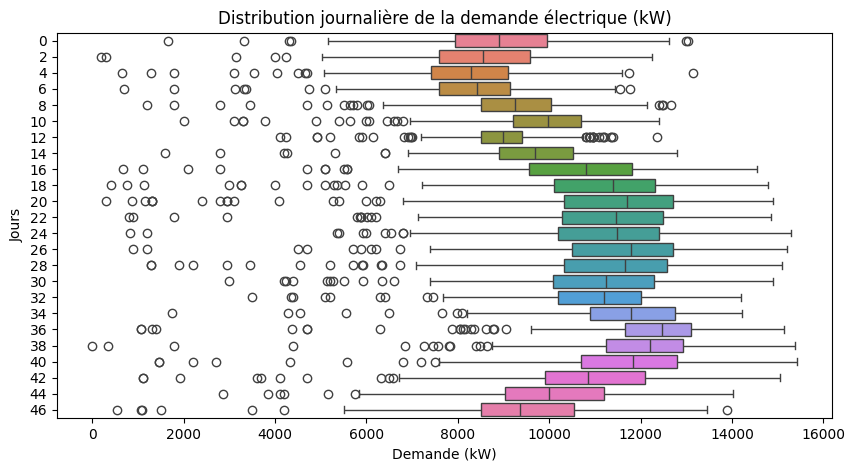

In [64]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=all_data.T, orient="h")  # Transpose pour boxplot par jour
plt.title("Distribution journalière de la demande électrique (kW)")
plt.xlabel("Demande (kW)")
plt.ylabel("Jours")

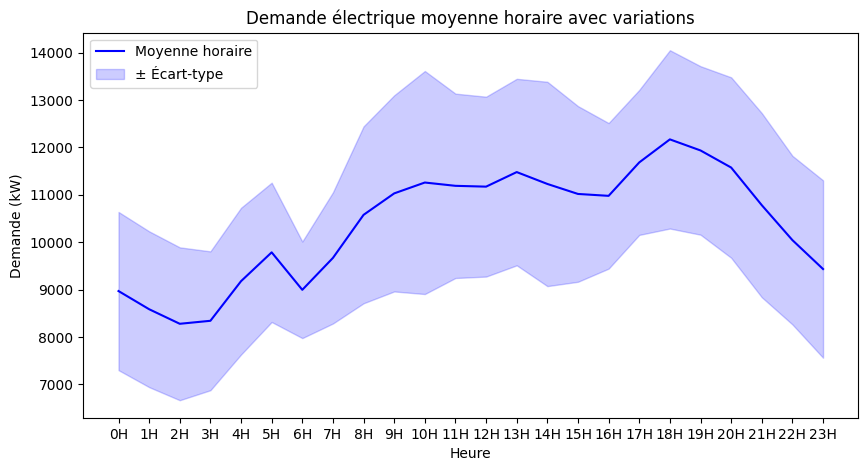

In [65]:
hourly_std = all_data.std(axis=1)  # Écart-type horaire

x = np.arange(24)  # Heures de la journée
y = hourly_mean
y_std = hourly_std

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Moyenne horaire", color='blue')
plt.fill_between(x, y - y_std, y + y_std, color='blue', alpha=0.2, label="± Écart-type")
plt.title("Demande électrique moyenne horaire avec variations")
plt.xlabel("Heure")
plt.ylabel("Demande (kW)")
plt.xticks(x, [f"{i}H" for i in x])
plt.legend()

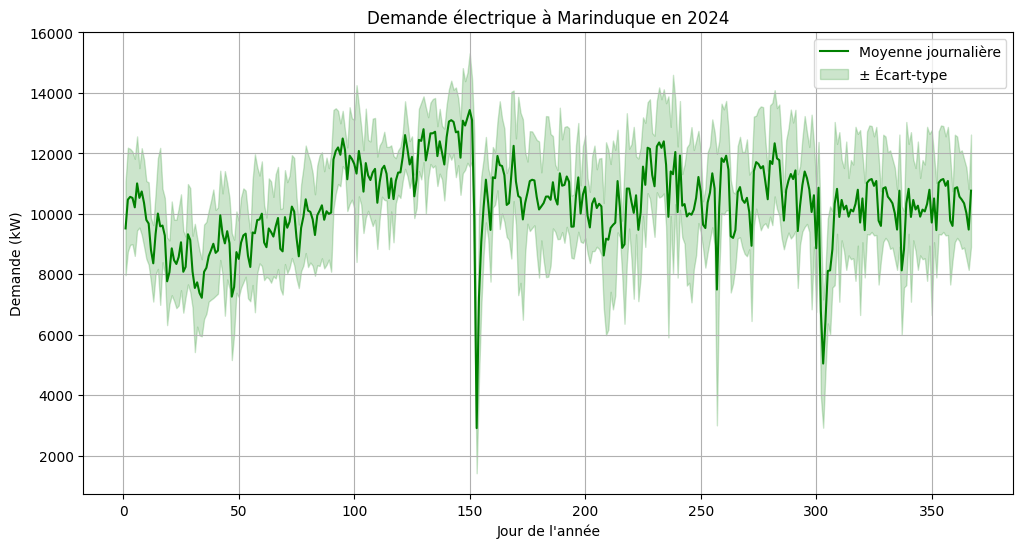

In [79]:
daily_mean = all_data.mean(axis=0)  # Moyenne journalière (365 jours)
daily_std = all_data.std(axis=0)  # Écart-type journalier

# Lineplot de l'évolution annuelle
plt.figure(figsize=(12, 6))
x = np.arange(1, 368)  # 365 jours (index)
plt.plot(x, daily_mean, label="Moyenne journalière", color='green')
plt.fill_between(x, daily_mean - daily_std, daily_mean + daily_std, color='green', alpha=0.2, label="± Écart-type")
plt.title("Demande électrique à Marinduque en 2024")
plt.xlabel("Jour de l'année")
plt.ylabel("Demande (kW)")
plt.legend()
plt.grid()

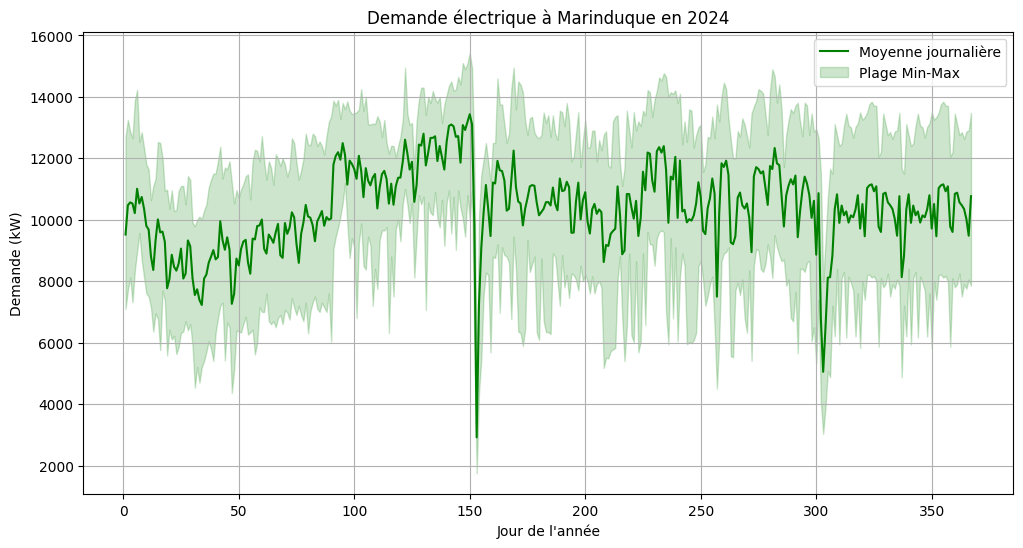

In [104]:
# Calcul des métriques journalières
daily_mean = all_data.mean(axis=0)  # Moyenne journalière
daily_min = all_data.min(axis=0)   # Valeur minimale journalière
daily_max = all_data.max(axis=0)   # Valeur maximale journalière

# when the daily_min is below 0.5 of the daily mean, we cap it to 0.5*daily mean :
daily_min = daily_min.where(daily_min > 0.6 * daily_mean, 0.6 * daily_mean)

# Lineplot de l'évolution annuelle avec bande min/max
plt.figure(figsize=(12, 6))
x = np.arange(1, 368)  # 365 jours (index)

plt.plot(x, daily_mean, label="Moyenne journalière", color='green')
plt.fill_between(x, daily_min, daily_max, color='green', alpha=0.2, label="Plage Min-Max")

plt.title("Demande électrique à Marinduque en 2024")
plt.xlabel("Jour de l'année")
plt.ylabel("Demande (kW)")
plt.legend()
plt.grid()
plt.savefig('demande_electrique.png', dpi=600)

Jour avec la plus grande oscillation : Jour 17
Amplitude de la demande ce jour-là : 4330.00 kW


/var/folders/sk/b9nfz0ds0qb1bg_32kp0qk1m0000gn/T/ipykernel_25015/2393173683.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Amplitude de la demande ce jour-là : {daily_range[most_oscillating_day]:.2f} kW")


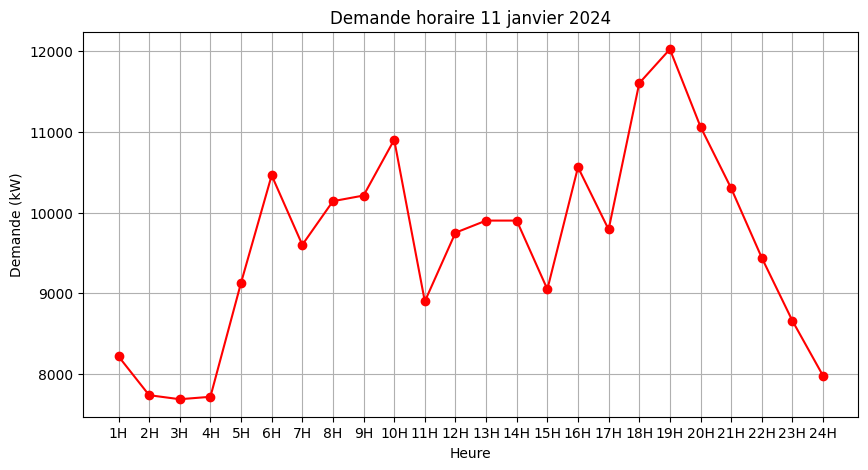

In [109]:
daily_range = all_data.max(axis=0) - all_data.min(axis=0)  # Écart max-min pour chaque jour
most_oscillating_day = int(daily_range.idxmax()[-2:])  # Index du jour avec la plus grande oscillation

print(f"Jour avec la plus grande oscillation : Jour {most_oscillating_day + 1}")
print(f"Amplitude de la demande ce jour-là : {daily_range[most_oscillating_day]:.2f} kW")

# Récupérer la demande pour ce jour
most_oscillating_day_data = all_data.iloc[:, most_oscillating_day]

# Plot des variations horaires pour ce jour
plt.figure(figsize=(10, 5))
x = np.arange(1, 25)  # 24 heures
plt.plot(x, most_oscillating_day_data, marker='o', color='red')
plt.title(f"Demande horaire 11 janvier 2024")
plt.xlabel("Heure")
plt.ylabel("Demande (kW)")
plt.xticks(x, [f"{i}H" for i in range(1, 25)])
plt.grid()
plt.savefig('demande_11_janvier.png', dpi=600)

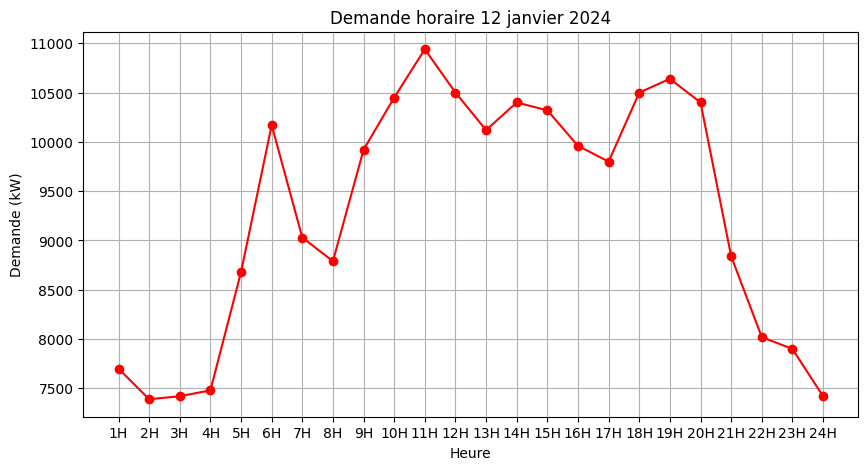

In [110]:
# Récupérer la demande pour ce jour
most_oscillating_day_data = all_data.iloc[:, most_oscillating_day+1]

# Plot des variations horaires pour ce jour
plt.figure(figsize=(10, 5))
x = np.arange(1, 25)  # 24 heures
plt.plot(x, most_oscillating_day_data, marker='o', color='red')
plt.title(f"Demande horaire 12 janvier 2024")
plt.xlabel("Heure")
plt.ylabel("Demande (kW)")
plt.xticks(x, [f"{i}H" for i in range(1, 25)])
plt.grid()
plt.savefig('demande_12_janvier.png', dpi=600)